In [129]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Homework 1 - Linear Regression

Please complete these exercises in addition to those outlined in the course notes.

### Exercise 1.22 - Implement simple linear regression

The goal of this exercise is to walk you through the process of implementing linear regression yourself from scratch in Python. We have provided skeleton code for you that you should fill out. 
**Get data into a numpy array, compute $a^*$ and $b^*$ with closed form solution, compare with built in solution, plot points and line.**

Recap: we want to find $a$ and $b$ so that the loss function $Q(a,b) = \sum_{i=1}^N (y_i - ax_i - b)^2$ is minimized. You have shown earlier in this assignment that $Q(a,b)$ is minimized when 
$$a^* = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} 
\quad \text{and} \quad b^* = \bar{y} - a^* \bar{x}$$

#### (a) Compute regression parameters

Below is the skeleton of a function called `regression_parameters` which takes, as inputs, two arrays: `x` and `y`. Fill in the function with expressions that compute the values for $a^*$ and $b^*$ above. Then, test your function in the cell below, which generates some *simulated* data that fits a specific linear model. Your function is likely working well if the output is close ($\pm 0.2$) to the true values of $a=5$ and $b=2$.



In [130]:
import numpy as np
def regression_parameters(x,y):
    '''
    Computs the optimal parameters for simple linear regression
    Inputs:
        x: a numpy array of the dependent variable
        y: a numpy array of the independent variable
    Returns:
        List of optimal regression parameters
    '''
    #making vars to keep track of numerator and denominator
    numerator = 0
    denominator =0
    
    #evaluating sum
    for z in range(len(x)):
        numerator += ((x[z] - np.average(x)) * (y[z] - np.average(y)))
        denominator += ((x[z] - np.average(x)) ** 2)
        
    #calculations as suggested by the formulas
    a_star = numerator/denominator
    b_star = np.average(y) - a_star*np.average(x)
    return [a_star, b_star]

In [131]:
# Run this cell to generate data to test your function

x = np.random.uniform(size=100) # generate x values random
noise = np.random.normal(scale=.1, size=100) # generate noise to add to the problem
a = 5 # set the slope
b = 2 # set the intercept
y = a*x + b + noise # generate y values using the model y = ax+b+noise

[a_star, b_star] = regression_parameters(x, y) # call your function!

print([a_star, b_star])

[5.039587083409831, 1.9620083273779123]


#### (b) Plotting your prediction

Now that we have computed estimates of the regression parameters, we can use them to make a prediction for any values of x: 
$$\hat{y} = a^*x + b^*$$
Anytime you run a regression, it's very important to plot the data with the prediction to see how well the model fits. 

The first step to doing this is to compute the *predicted* or *fitted* value of $y$. This is the result of plugging your original values for $x$ back into the best fit line you computed. In the function called `predict`, write an expression that will return the fitted values for given paramters $a,b$ and an input array $x$.

Now, compute the prediction $\hat{y}$ and make a plot that plots the original data $(x,y)$ as a *scatterplot* with the predicted data $(x, \hat{y})$ as a *line* on top of the scatterplot.

**Hint:** It might be useful to set these plots to use different colors so it's easier to distinguish the points and the line; you can do this by adding the `color=` argument to the plotting function. See [here](https://matplotlib.org/stable/gallery/color/named_colors.html) for the list of available colors.



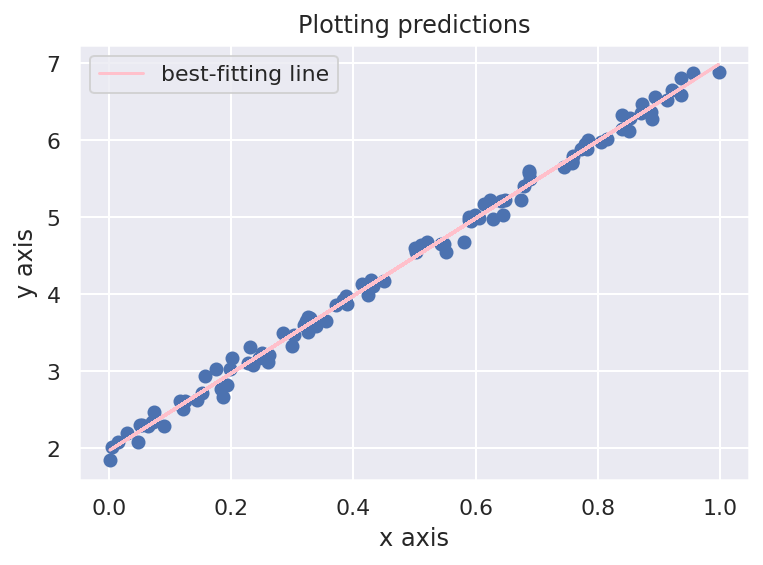

In [133]:

#imports
from matplotlib import pyplot as plt

#function to predict values
def predict(a,b,x):
    return a*x + b

y_hat = predict(a_star, b_star, x) # replace with expression to make a prediction

# Add plotting code here
plt.scatter(x,y)
plt.title("Plotting predictions")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.plot(x,y_hat, color="pink", label="best-fitting line")
plt.legend()

Based on your plot, can you identify an issues with this model? Do the residuals look ok? State the two important assumptions you make when doing linear regression (look at the "Diagnostics" slides from Lecture 3) and whether or not your model is in violation of either of them.

The model seems to be fine, as there are none extreme leveraging or influencing outliers. There are some residuals, which are expected, as with any other model. The two assumptions you make when doing linear regression are that the residuals always sum to 0, and that the residuals should not be correlated with x. The model is homoscedastic, and the model looks to be following both of the rules. 



#### (c) Evaluate your model

After computing regression parameters, we are often interested in how well the model prediction matches the actual data. A popular choice for this is using the value $R^2$, also known as the *coefficient of determination*, defined as 

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{\sum_{i=1}^n(y_i - \bar{y})^2} = 1 - \frac{SS_{res}}{SS_{tot}}$$

where $SS_{res}$ stands for the *residual sum of squares* and $SS_{tot}$ stands for the *total sum of squares*

Fill in the function `r2` that takes as inputs the true $y$ value and the predicted $\hat{y}$, and returns $R^2$. Then, compute the value of $R^2$ for the prediction you made in the previous section. Is it a good fit? Provide an interpretation for this value.

[Double click this cell and replace this text with your answer]



In [22]:
#r2 function
def r2(y, y_hat):
    ss_res =0
    ss_tot =0 
    for x in range(len(y)):
        ss_res += (y[x]-y_hat[x])**2 
        ss_tot += (y[x]-np.average(y))**2 
    return 1 - ss_res/ss_tot

#0.99 seems good
print(r2(y,y_hat))

0.9944538031589494


#### (d) Try it all on spending/SAT data

Now that we have gone through the key steps of implementing linear regression on some simulated data, let's try it on the 2019 test scores vs. student spending data we analyzed in class. Run the cell below to create a dataframe containing all the data.

In [28]:
data = np.array([[10123, 1150],
                 [8452, 1010],
                 [20241, 1420],
                 [5054, 950],
                 [4442, 840],
                 [14522, 1300]])
col1 = "avg_spending_per_student"
col2 = "avg_sat"

df = pd.DataFrame(data = data, index = [f"District {i+1}" for i in range(data.shape[0])],
                 columns = [col1, col2])

df

,avg_spending_per_student,avg_sat
District 1,10123,1150
District 2,8452,1010
District 3,20241,1420
District 4,5054,950
District 5,4442,840
District 6,14522,1300


Using this dataset, you need to

- Compute the regression parameters $a^*$ and $b^*$ and **provide an interpretation for these parameters**
- Plot the data with the predicted line superimposed on top and comment on the residuals
- Evaluate $R^2$ for the prediction and comment

Use the functions we defined earlier as needed!



0.03565763552348768
738.2480215861959
A-star is the slope, B-star is the y-int of the best fit line
0.9538163628605961
the line fits pretty well- as the correlation of the fit is 0.95 r^2


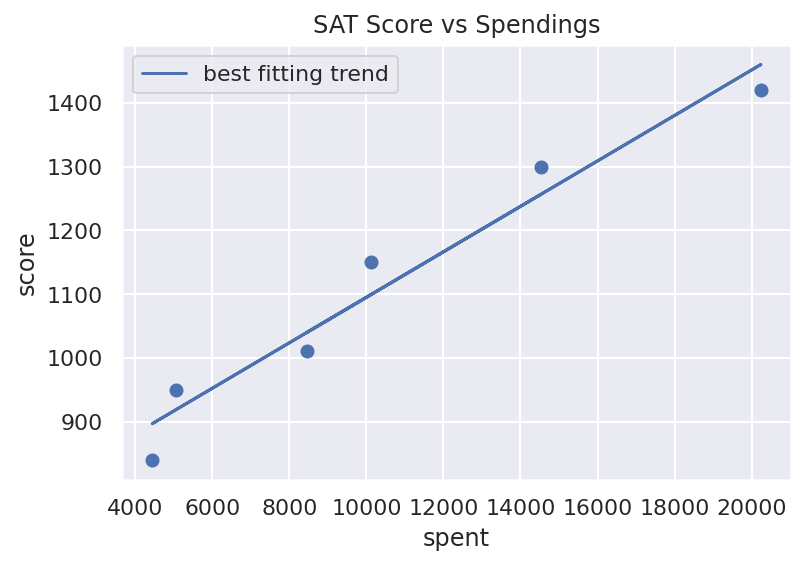

In [135]:
# put your code here (feel free to use as many cells as you want)
astar, bstar = regression_parameters(df.avg_spending_per_student,df.avg_sat)
print(astar)
print(bstar)
print("A-star is the slope, B-star is the y-int of the best fit line")
#predicting
y_hat = predict(astar, bstar, df.avg_spending_per_student)
plt.plot(df.avg_spending_per_student, y_hat,label="best fitting trend")
plt.scatter(df.avg_spending_per_student,df.avg_sat)
plt.xlabel("spent")
plt.ylabel("score")
plt.legend()
plt.title("SAT Score vs Spendings")
print(r2(df.avg_sat, y_hat))
print("the line fits pretty well- as the correlation of the fit is 0.95 r^2")

Which of these predicted SAT scores are reasonable? Which are not? Why?

The line is reasonable within a certain range. However, spending less than ~\$5000 is unreasonable, as the scores drop exponentially from there. Aditionally, the curve flattens out around ~\$200,000, as more spending may not increasing your average score\- since the test is only out of 1600 \(there is a limit\). 


#### (e) Compare solution to scikit-learn

Implementing regression by hand is a useful exercise for understanding exactly what's happening under the hood when you use other methods for running regressions (and we will be implementing lots of algorithms by hand in this class). However, in practice, you will almost always be using a function provided by a Python library to build your machine learning models. 

The library [scikit-learn](https://scikit-learn.org/stable/) is the standard Python machine learning library and has implementations for most machine learning methods. The following code will carry out simple linear regression using scikit-learn on the spending/SAT data; please read the comments carefully to try to understand what is going on, as you will likely want to use scikit-learn for your project.



In [33]:
from sklearn.linear_model import LinearRegression # need to import the LinearRegression library

lm = LinearRegression() # initialize the model object
x = df[['avg_spending_per_student']] # extract the independent variable (note the strange double brackets here - 
                                     # this is because scikit leran is expecting something 2D as its first argument, since typically, you use more than 1 predictor in linear regression. 
            4                         # If you don't do this, you'll get an error asking you to reshape your data.)
y = df.avg_sat # extract the dependent variable
lm.fit(x, y) # fit the model (note that this is happening in place - you don't assign the output to anything, the `lm` object has now learned the parameters from x and y)
print("slope=", lm.coef_[0])
print("intercept=", lm.intercept_)

slope= 0.035657635523487684
intercept= 738.2480215861958


Are these estimates the same as the estimates you computed by hand? YES!

\(they should be \- no need to do anything for this problem, just a useful thing to go through\).


#### (e) Extrapolate

In order to hang the hang of linear regression, we have been using clean examples and have only made predictions on the datasets themselves. Oftentimes, we build a model because we are interested in making predictions on *new* data.

Using the parameters found in the previous section, predict the average SAT score for students in districts with the following average spending (try to think of a way to build an array that will make this predicting straightforward):

- \$0
- \$1,000
- \$10,000
- \$20,000
- \$100,000



In [39]:
# put code here

#arrays for inputs
inputs = [0,1000,10000,20000,100000]

#printing corresponding spending and calculating based on formula y = mx+b
for i in range(len(inputs)): print("Spending: $" + str(inputs[i]) + ", Average SAT: " + str(lm.coef_[0]*inputs[i] + lm.intercept_))

Spending: $0, Average SAT: 738.2480215861958
Spending: $1000, Average SAT: 773.9056571096835
Spending: $10000, Average SAT: 1094.8243768210727
Spending: $20000, Average SAT: 1451.4007320559494
Spending: $100000, Average SAT: 4304.011573934964


Which of these predicted SAT scores are reasonable? Which are not? Why?

As stated eariler, much of the predictions are reasonable, however it is clear that the curve is not linear and that evenually it should flatten out. For example, spending \$100,000 predicts an SAT of 4304; however that is impossible and fails to take into account the SAT limit of 1600.  The curve rather, should probably be logorathmic. 


### Exercise 1.23 - Anscombe's quartet

The file `anscombe.csv` contains four different small datasets - each dataset is indicated by the column `data` (that is, all (x,y) values associate with the same value for `data` belong to the same dataset).

Run the cell below to load the data:



In [96]:
anscombe = pd.read_csv('anscombe.csv')
anscombe.head()

     x      y  data
0   10   8.04     0
1    8   6.95     0
2   13   7.58     0
3    9   8.81     0
4   11   8.33     0
5   14   9.96     0
6    6   7.24     0
7    4   4.26     0
8   12  10.84     0
9    7   4.82     0
10   5   5.68     0


#### (a) Compute regression parameters for each dataset

First, we want to take each dataset in this one dataframe and run a simple linear regression where the independent variable is $x$ and the dependent variable is $y$. Keep track of parameters estimated for each dataset, along with the $R^2$ value of the predicton. What do you notice?

**Hint 1:** a `for` loop might be helpful here

**Hint 2:** recall that you can filter a dataframe to extract only the rows that you want!



In [139]:
# code goes here
from sklearn.metrics import r2_score

anscombe = pd.read_csv('anscombe.csv')
from sklearn.linear_model import LinearRegression # need to import the LinearRegression library
for z in range(4):
    
    #extracting data
    new = anscombe[anscombe.data == z]
    #new linear regression 
    lm = LinearRegression() # initialize the model object
    x = new[["x"]] # extract the independent variable (note the strange double brackets here - 
    y = new[["y"]] # extract the dependent variable
    lm.fit(x, y) # fit the model (note that this is happening in place - you don't assign the output to anything, the `lm` object has now learned the parameters from x and y)
    
    #getting and outputting params
    slope = lm.coef_[0][0]
    print("Data Summary for data #", z)
    intercept = lm.intercept_[0]
    print("slope=", lm.coef_[0][0])
    print("intercept=", lm.intercept_[0])
    print("r-score=", lm.score(x,y)) 
    print("\n")


print("I noticed that the r-scores are pretty low; at 0.6664538423204792, this indicates there is not a very good correlation within the data. Additionally, I noticed that the r-scores are pretty much equivalent for all of the datasets. This shows the consistency in correlation.")

Data Summary for data # 0
slope= 0.5000909090909093
intercept= 3.0000909090909094
r-score= 0.6665424595087748


Data Summary for data # 1
slope= 0.5
intercept= 3.00090909090909
r-score= 0.6662420337274844


Data Summary for data # 2
slope= 0.4997272727272728
intercept= 3.002454545454545
r-score= 0.6663240410665592


Data Summary for data # 3
slope= 0.49990909090909097
intercept= 3.0017272727272726
r-score= 0.6667072568984653


I noticed that the r-scores are pretty low; at 0.6664538423204792, this indicates there is not a very good correlation within the data. Additionally, I noticed that the r-scores are pretty much equivalent for all of the datasets. This shows the consistency in correlation.


#### (b) Plot the datasets

Now, plot each of the 4 datasets (if you are using a `for` loop, you can get plots to show up at each iteration by calling `plt.show()` after you've generated the plot). What do you notice? How does this make you feel about the results from part (a)?

I noticed that the r\-score of the datasets are very surpising , and that within the individual sets there are a variety of outcomes. For example, datasets 1\-2 seemed the best fitted after plotting, however, the r\-scores indicate that they are worse. This makes me rethink the results of the r\-score from part A, and regonize the power of outliers within a small dataset.


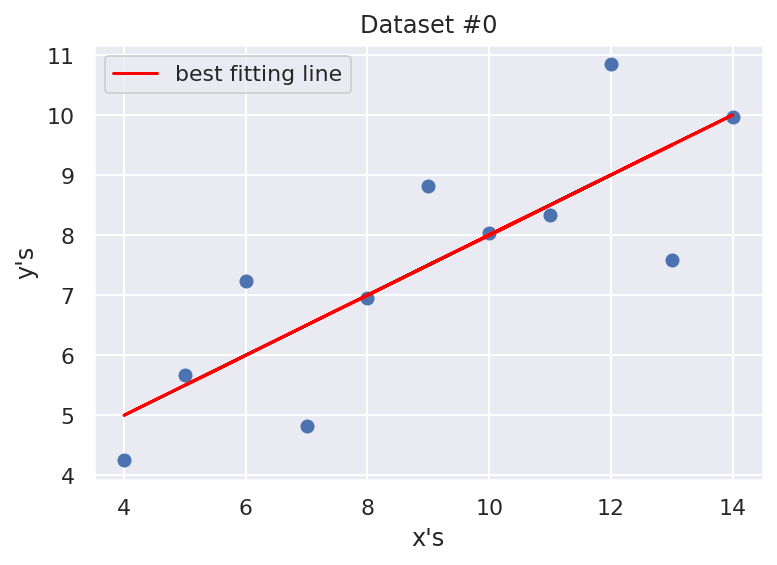

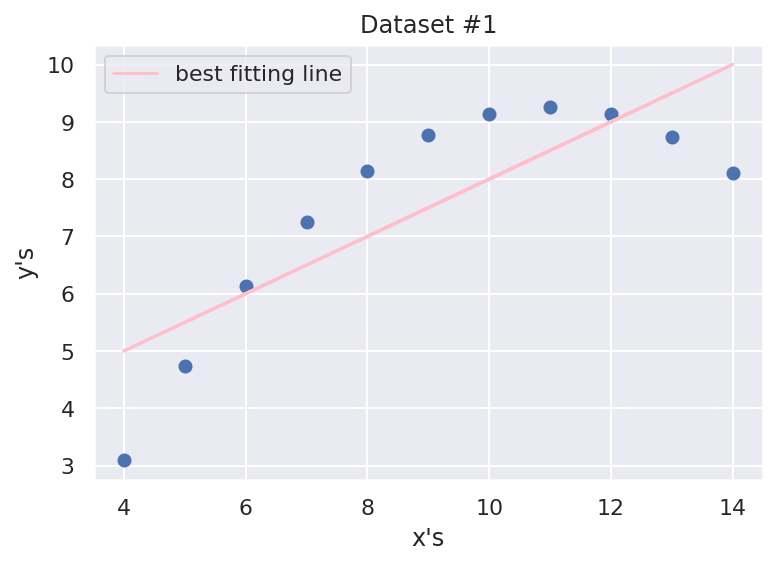

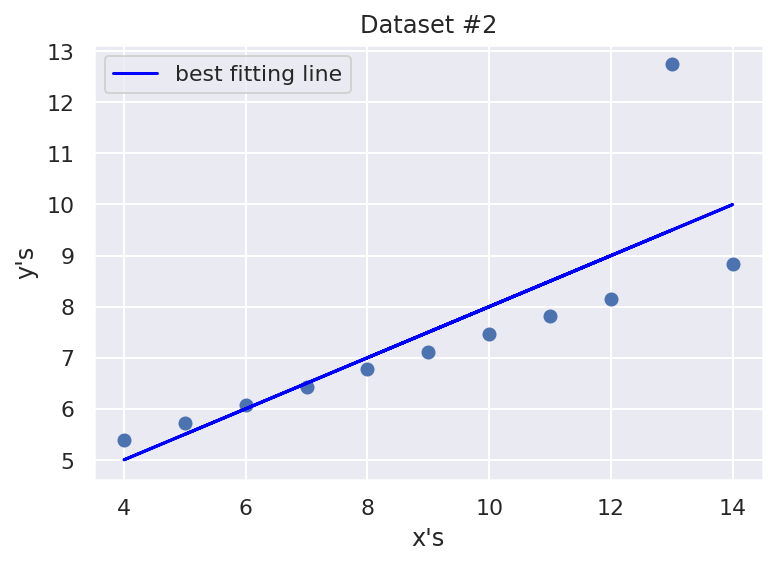

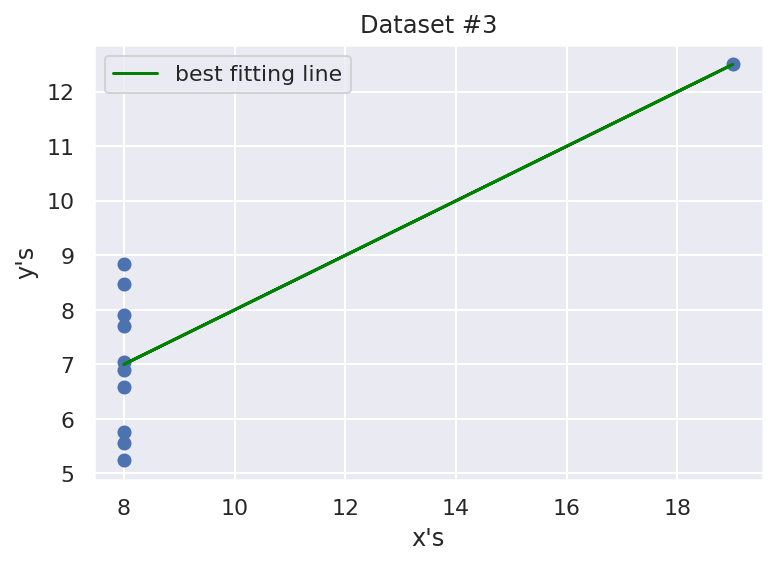

In [144]:
# Plotting code goes here

#range of colors to switch them up in array
colors = ["red", "pink", "blue", "green"]

for z in range(4):
    
    #extracting data
    new = anscombe[anscombe.data == z]
    #new linear regression 
    lm = LinearRegression() # initialize the model object
    x = new[["x"]] # extract the independent variable (note the strange double brackets here - 
    y = new[["y"]] # extract the dependent variable
    lm.fit(x, y) # fit the model (note that this is happening in place - you don't assign the output to anything, the `lm` object has now learned the parameters from x and y)
    
    #title up
    plt.title("Dataset #" + str(z))
    plt.xlabel("x's")
    plt.ylabel("y's")
    
    #getting and outputting params
    slope = lm.coef_[0][0]
    intercept = lm.intercept_[0]
    
    #plotting scatter plot using original inputs
    plt.scatter(x,y)
    
    #plotting best fitting line using newly created params
    plt.plot(x,slope*x+intercept,label="best fitting line",color=colors[z])
    plt.legend()
    plt.show()
   

#### (c) Pick a model

Which, if any, of the datasets does the model fit best? Why?

From the human\-eye it seems as if dataset 2 is the most accurate. However, it has an outlier at x=13, which is affecting the correlation coefficent signficatnly. From the numbers, I hypothesize that the last dataset \(3\) is the best fit. Although the numbers are almost identical, and the looks are deceiving, the numbers say that its r2 value is the highest\- being 0.6667072568984653. It is definetely unexpected, however I have to trust the data and say that Dataset 3 has the best fitting model \(reducing loss/error\).
